In [1]:
import os
import tqdm
import pandas as pd
import numpy as np

In [2]:
#%load_ext autoreload
#%autoreload 2
import socceraction.spadl as spadl
import socceraction.vaep.features as fs
import socceraction.xthreat as xthreat

In [3]:
file_path = r"C:\Users\bruger\OneDrive - Aarhus Universitet\Dokumenter\Neels Documenter\Uni\10. semester\Forsøg\Actions.xlsx"
data = pd.read_excel(file_path)


In [15]:
print(data)

        game_id  original_event_id  period_id  time_seconds  team_id  \
0       2367375       2.590849e+09          1           0.0      239   
1       2367375       2.590849e+09          1           1.0      239   
2       2367375       2.590849e+09          1           4.0      239   
3       2367375       2.590849e+09          1           7.0      239   
4       2367375       2.590849e+09          1          10.0      420   
...         ...                ...        ...           ...      ...   
220151  2367362       2.580459e+09          2        3082.0      547   
220152  2367362       2.580459e+09          2        3083.0     2450   
220153  2367362       2.580459e+09          2        3085.0     2450   
220154  2367362                NaN          2        3085.5     2450   
220155  2367362       2.580459e+09          2        3086.0     2450   

        player_id  start_x  end_x  start_y  end_y  ...  action_id  type_name  \
0          492654     49.7   52.5     50.1   53.3  ... 

In [6]:
missing_end_x_y = data[data['end_x'].isna() & data['end_y'].isna()]
print(missing_end_x_y)

        game_id  original_event_id  period_id  time_seconds  team_id  \
26155   2367429       2.625282e+09          2        3061.0     2397   
33277   2367460       2.661238e+09          2        2882.0      239   
49064   2367351       2.575435e+09          2        3119.0      569   
74171   2367430       2.625166e+09          2        2951.0     1000   
79354   2367378       2.589997e+09          2        3068.0      569   
81234   2367367       2.583178e+09          2        3002.0     1000   
134612  2367464       2.661241e+09          2        3028.0      569   
137925  2367434       2.624580e+09          2        3059.0     2592   
148255  2367385       2.595082e+09          2        3126.0     1943   
195718  2367421       2.617173e+09          2        3061.0     2450   

        player_id  start_x  end_x  start_y  end_y  ...  action_id  type_name  \
26155      544960     28.3    NaN     93.4    NaN  ...       1829    dribble   
33277      208766     26.1    NaN     25.4    N

In [7]:
data2 = data.dropna(subset=['end_x'])


In [25]:
xTModel = xthreat.ExpectedThreat(l=16, w=12)
xTModel.fit(data2);

# iterations:  35


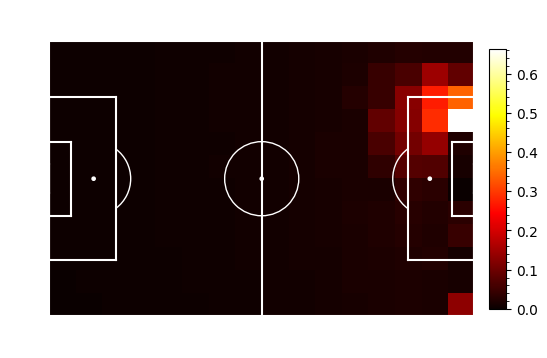

NotImplementedError: `interp2d` has been removed in SciPy 1.14.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
https://scipy.github.io/devdocs/tutorial/interpolate/interp_transition_guide.html


In [22]:
import matplotsoccer as mps

# Inspect the learned heatmap
mps.heatmap(xTModel.xT, cmap="hot", linecolor="white", cbar="True")

# Inspect the interpolated heatmap used for predictions
interp = xTModel.interpolator()
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 100, 1000)
mps.heatmap(interp(x,y), cmap="hot", linecolor="white", cbar="True")

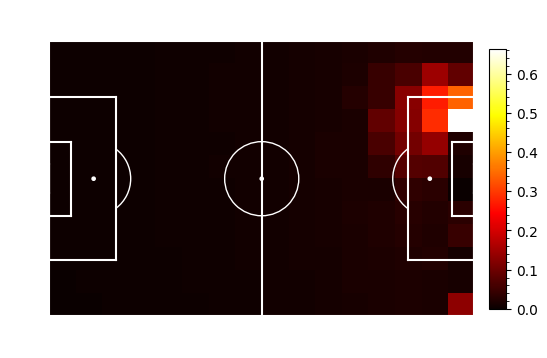

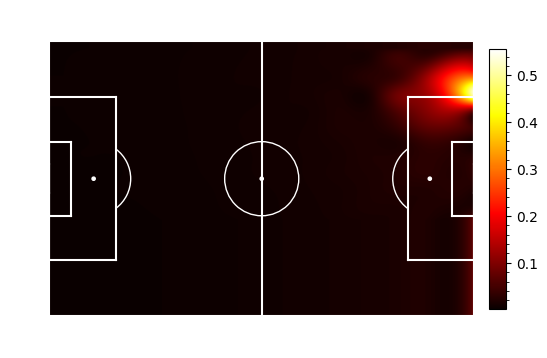

<Axes: >

In [35]:
import numpy as np
import matplotsoccer as mps
from scipy.interpolate import RectBivariateSpline
import socceraction.spadl.config as spadlconfig


# Inspect the learned heatmap
mps.heatmap(xTModel.xT, cmap="hot", linecolor="white", cbar="True")

# Create the interpolator manually
cell_length = spadlconfig.field_length / xTModel.xT.shape[1]
cell_width = spadlconfig.field_width / xTModel.xT.shape[0]
x = np.arange(0.0, spadlconfig.field_length, cell_length) + 0.5 * cell_length
y = np.arange(0.0, spadlconfig.field_width, cell_width) + 0.5 * cell_width

# Use RectBivariateSpline instead of interp2d
interp = RectBivariateSpline(y, x, xTModel.xT)

# Generate fine-grid values
x_fine = np.linspace(0, 100, 1000)
y_fine = np.linspace(0, 100, 1000)
X, Y = np.meshgrid(x_fine, y_fine)

# Plot interpolated heatmap
mps.heatmap(interp(y_fine, x_fine), cmap="hot", linecolor="white", cbar="True")
